In [22]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

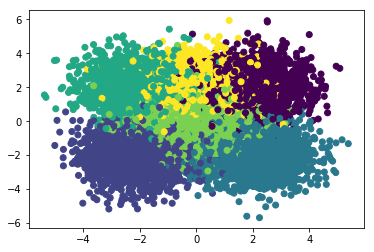

In [23]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [0, 0], [0, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Mean Shift

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.075, n_samples=500)


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


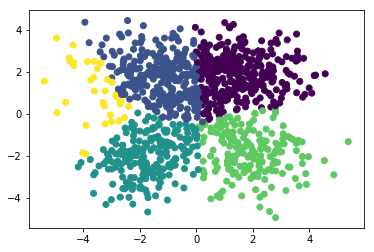

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3   4
row_0                        
0      172    2    0    2   0
1        0    1  172    4   9
2        4    0    4  143   0
3        6  136    2    0  25
4       52   58   26   28   1
5       72   77    0    4   0


In [36]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Spectral Clustering

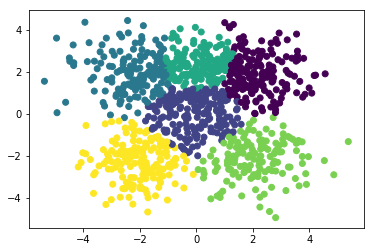

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4    5
row_0                             
0      143    6    0  27    0    0
1        0   21    4   0    3  158
2        5   11    0   0  134    1
3        0    8  126  34    0    1
4       14  120    7  12    7    5
5       16   25   25  86    1    0


In [26]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Affinity Propagation

In [27]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 32


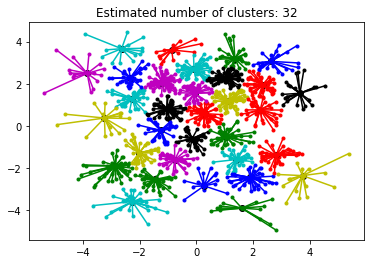

In [28]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# K-Means

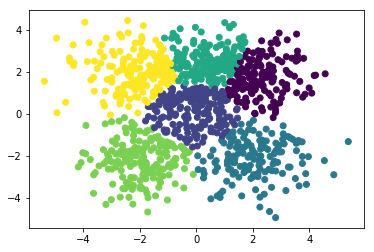

In [29]:
from sklearn.cluster import KMeans
# Calculate predicted values.
y_pred = KMeans(n_clusters=6).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

## DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

# Summary

1) Added 2 blobs (5 total) in symmetrical and close positions --> [[2, 2], [-2, -2], [2, -2], [-2, 2], [0, 0]].  Mean-shift initially produced 1 cluster until we changed the quantile from 0.2 to 0.1.  Changing the quantile produced 5 clusters.  Mean Shift, Spectral, and K-Means all looked pretty similar in this configuration.  Affinity propogation produced 30 clusters.

2) Removed [0,0] blob (4 total).  Set quantile back to 0.2 on Mean-shift.  Mean-shift and K-Means looked similar.  Spectral had some outlying values.  Affinity Propogation produced 25 clusters.

3) Did 6 blobs at [[2, 2], [-2, -2], [2, -2], [-2, 2], [0, 0], [0, 2]]. Meanshift needed quantile adjusted.  Came up with 3 clusters at 0.1.  Had 9 clusters at 0.05.  Had 5 clusters at 0.075.  Shapes not quite the same as the others.  K-Means and Spectral had similar results. Affinity had 32 clusters.

K-Means and Spectral clusters were adjusted to the number of blobs we set up initially.  

Meanshift needed quantile adjustments when the blobs were too close together, otherwise it would group into fewer clusters.  

